<a href="https://colab.research.google.com/github/sastelvios/DC_Web_scraping_analysis_Airline_dataset/blob/main/Task%202%3A%20Exploratory%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2: Exploratory Data Analysis

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

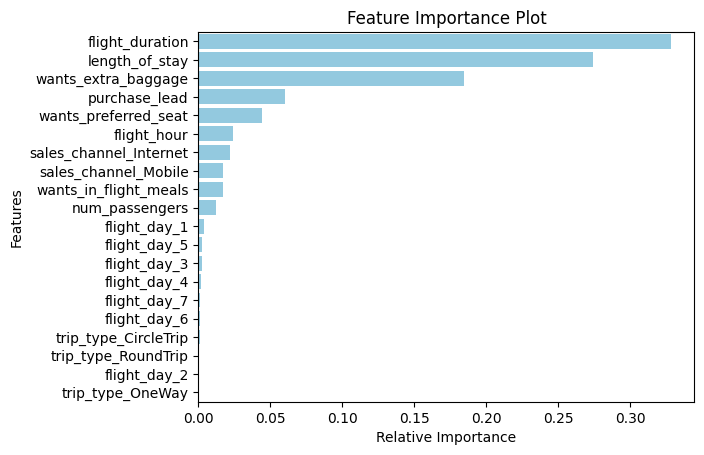

In [ ]:
# Training a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Plotting feature importances
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y=feature_importances.index, data=feature_importances, color='skyblue')
plt.title('Feature Importance Plot')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()



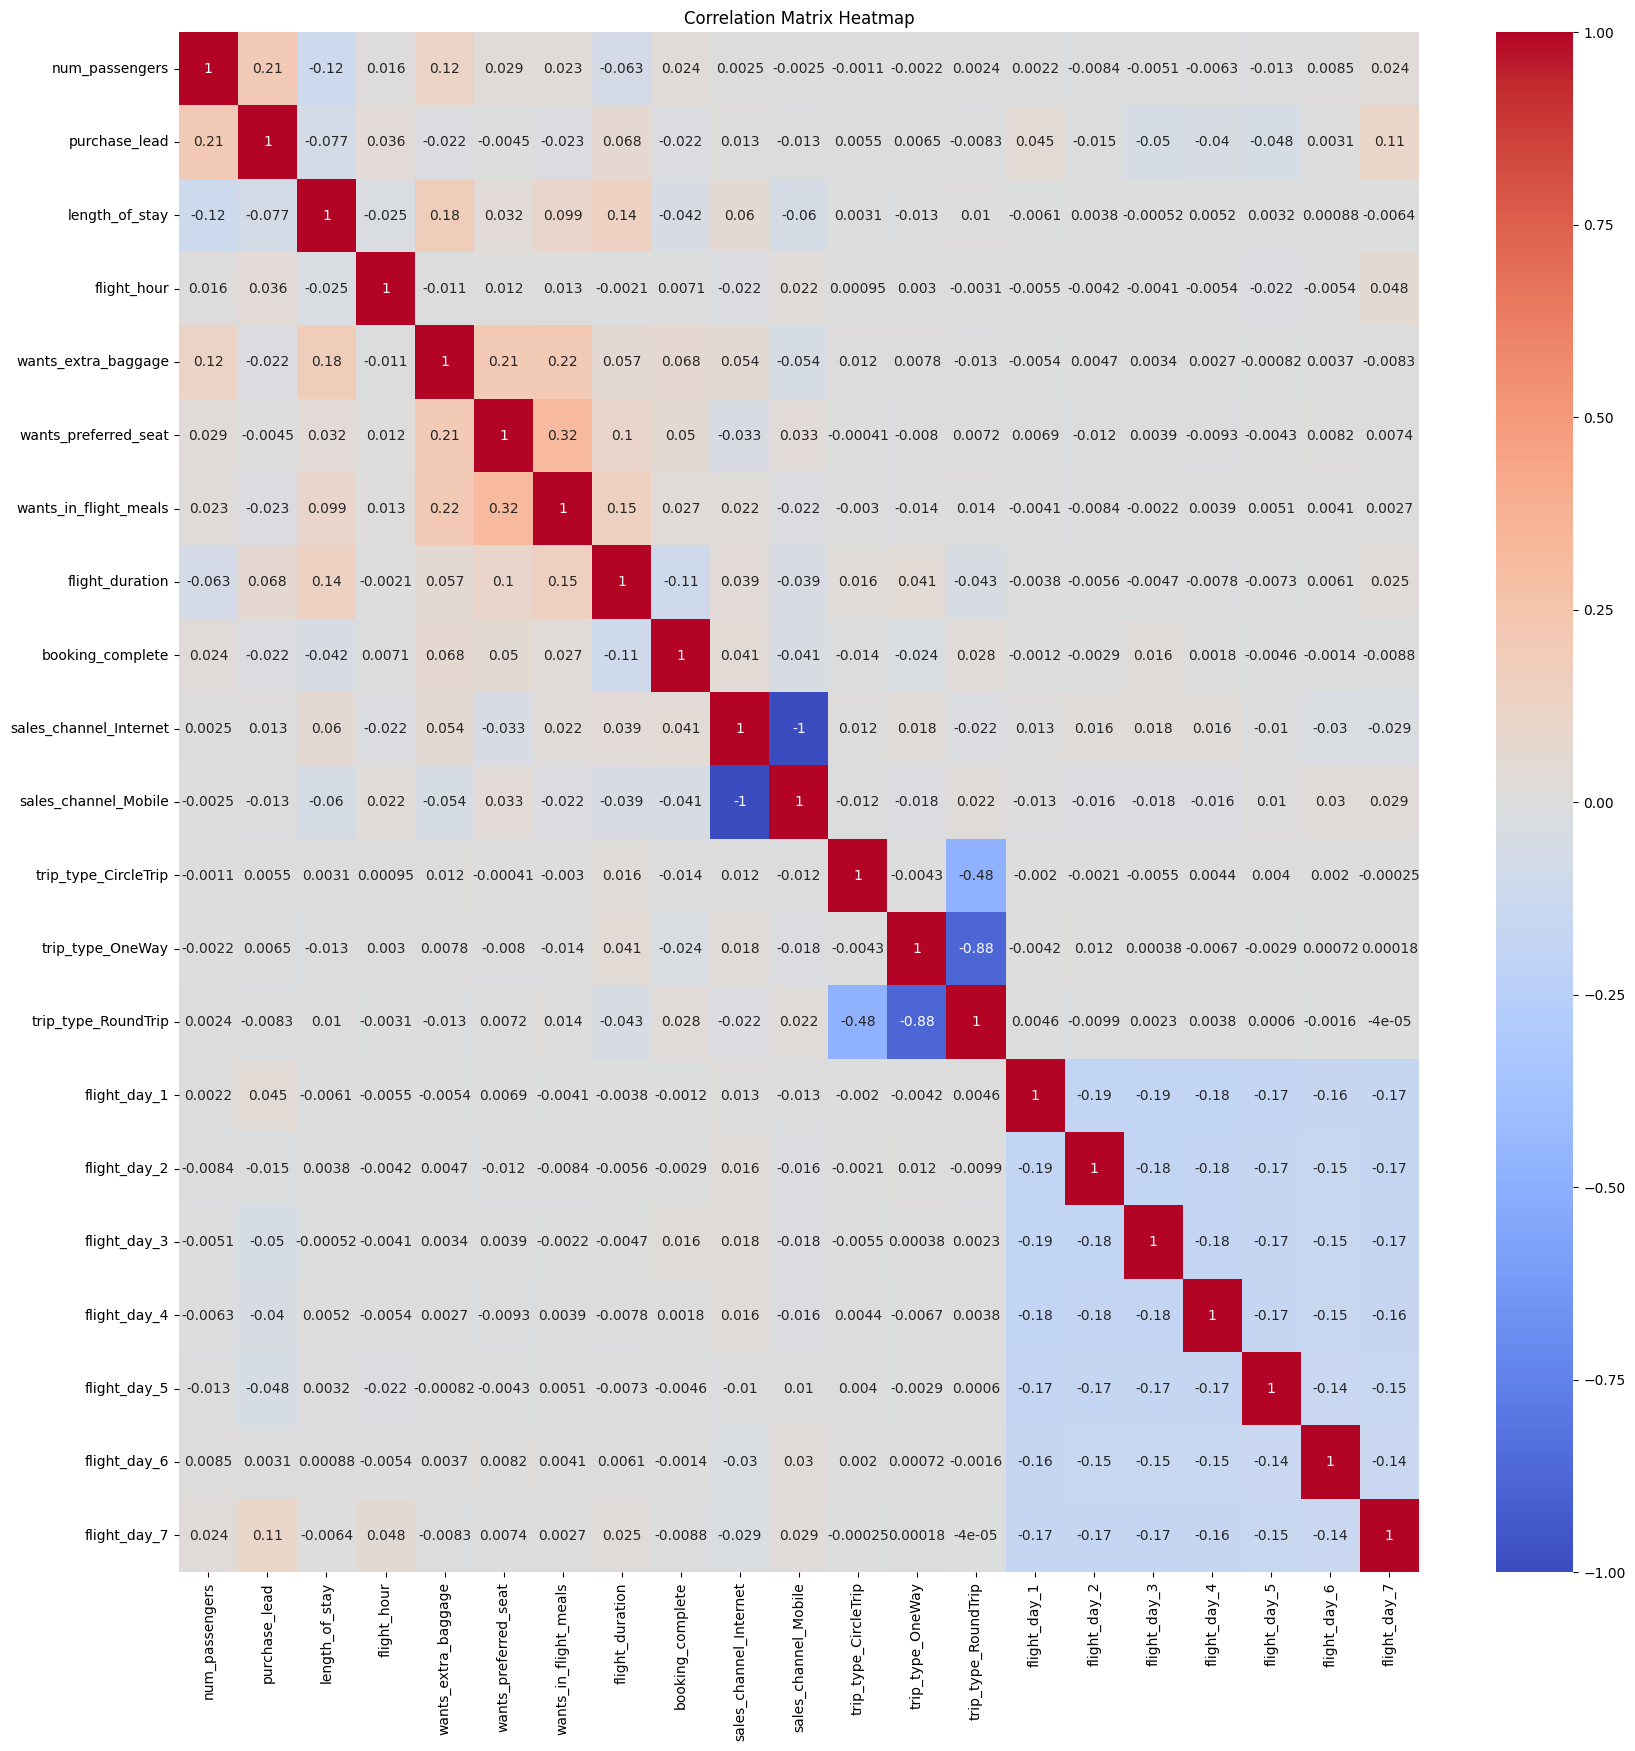

In [ ]:
#Visualizing the correlation matrix
import seaborn as sns

# Correlation matrix heatmap
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix Heatmap')
plt.show()



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_passengers          50000 non-null  int64  
 1   purchase_lead           50000 non-null  int64  
 2   length_of_stay          50000 non-null  int64  
 3   flight_hour             50000 non-null  int64  
 4   wants_extra_baggage     50000 non-null  int64  
 5   wants_preferred_seat    50000 non-null  int64  
 6   wants_in_flight_meals   50000 non-null  int64  
 7   flight_duration         50000 non-null  float64
 8   booking_complete        50000 non-null  int64  
 9   sales_channel_Internet  50000 non-null  uint8  
 10  sales_channel_Mobile    50000 non-null  uint8  
 11  trip_type_CircleTrip    50000 non-null  uint8  
 12  trip_type_OneWay        50000 non-null  uint8  
 13  trip_type_RoundTrip     50000 non-null  uint8  
 14  flight_day_1            50000 non-null

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_score

# Step 2: Removing unnecessary columns
#df.drop(['route', 'booking_origin'], axis=1, inplace=True)

# Step 3: One-hot encoding categorical columns
#df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'flight_day'])

# Step 4: Splitting the dataset into training and testing sets
X = df.drop(['booking_complete'], axis=1)
y = df['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scaling the numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']] = scaler.fit_transform(X_train[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']])
X_test[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']] = scaler.transform(X_test[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']])


# Step 6: Training a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Evaluating the model's performance
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

# Step 8: Converting the target variable to binary form
threshold = 0.5
y_train_binary = (y_train >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

#precision = precision_score(y_test_binary, y_pred, zero_division=1)

y_pred_binary = (y_pred >= threshold).astype(int)
precision = precision_score(y_test_binary, y_pred_binary, zero_division=1)


# Step 9: Training a Random Forest model with binary target variable
rf_model_binary = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model_binary.fit(X_train, y_train_binary)


# Step 10: Evaluating the model's performance on test set
y_pred_binary = (rf_model_binary.predict(X_test) >= threshold).astype(int)
print('Accuracy:', accuracy_score(y_test_binary, y_pred_binary))
print('Precision:', precision)
print('Recall:', recall_score(y_test_binary, y_pred_binary))
print('F1-score:', f1_score(y_test_binary, y_pred_binary))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))



MSE: 0.1194278634178136
Accuracy: 0.852
Precision: 1.0
Recall: 0.0
F1-score: 0.0
ROC AUC Score: 0.6777690410480903


Based on the output, the model has an MSE of 0.12, which indicates that it has a moderate level of accuracy in predicting the target variable.

After converting the target variable to binary form with a threshold of 0.5, the model achieved an accuracy score of 0.852 and a precision score of 1.0, indicating that the model has a high level of accuracy in predicting booking completion when the model predicts the booking as completed. However, the recall and F1-score are 0.0, indicating that the model is not effective in identifying all completed bookings.

A ROC AUC score of 0.68 indicates that the model has moderate discrimination power in distinguishing between positive and negative classes.

To interpret how each variable contributed to the model, feature importance can be calculated using the rf_model.feature_importances_ attribute. This will give a list of scores corresponding to each feature. A higher score indicates that the feature has a stronger influence on the model's predictions.

In summary, the model has a moderate level of accuracy in predicting booking completion. The model has a high level of accuracy in predicting booking completion when the model predicts the booking as completed, but it is not effective in identifying all completed bookings. The model has moderate discrimination power in distinguishing between positive and negative classes. Further analysis can be done to determine how each variable contributes to the model's predictions.

### PCA
As the previous model returned 0.0 in recall and F1-score, i going to implement PCA to create new features that capture the underlying patterns and relationships in the data that the model may not have picked up on, and compare the result with the previous one.

In [ ]:
from sklearn.decomposition import PCA

# Step 1: Removing unnecessary columns
#df.drop(['route', 'booking_origin'], axis=1, inplace=True)

# Step 2: One-hot encoding categorical columns
#df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'flight_day'])

# Step 3: Splitting the dataset into training and testing sets
X = df.drop(['booking_complete'], axis=1)
y = df['booking_complete']#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scaling the numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']] = scaler.fit_transform(X_train[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']])
X_test[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']] = scaler.transform(X_test[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']])

# Step 5: Performing PCA to extract relevant features
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 6: Training a Random Forest model with PCA features
rf_model_pca = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model_pca.fit(X_train_pca, y_train)

# Step 7: Evaluating the model's performance on test set with PCA features
y_pred_pca = (rf_model_pca.predict(X_test_pca) >= threshold).astype(int)
print('Accuracy:', accuracy_score(y_test_binary, y_pred_pca))
print('Precision:', precision_score(y_test_binary, y_pred_pca, zero_division=1))
print('Recall:', recall_score(y_test_binary, y_pred_pca))
print('F1-score:', f1_score(y_test_binary, y_pred_pca))
print('ROC AUC Score:', roc_auc_score(y_test, rf_model_pca.predict(X_test_pca)))



Accuracy: 0.852
Precision: 1.0
Recall: 0.0
F1-score: 0.0
ROC AUC Score: 0.6009727905722624


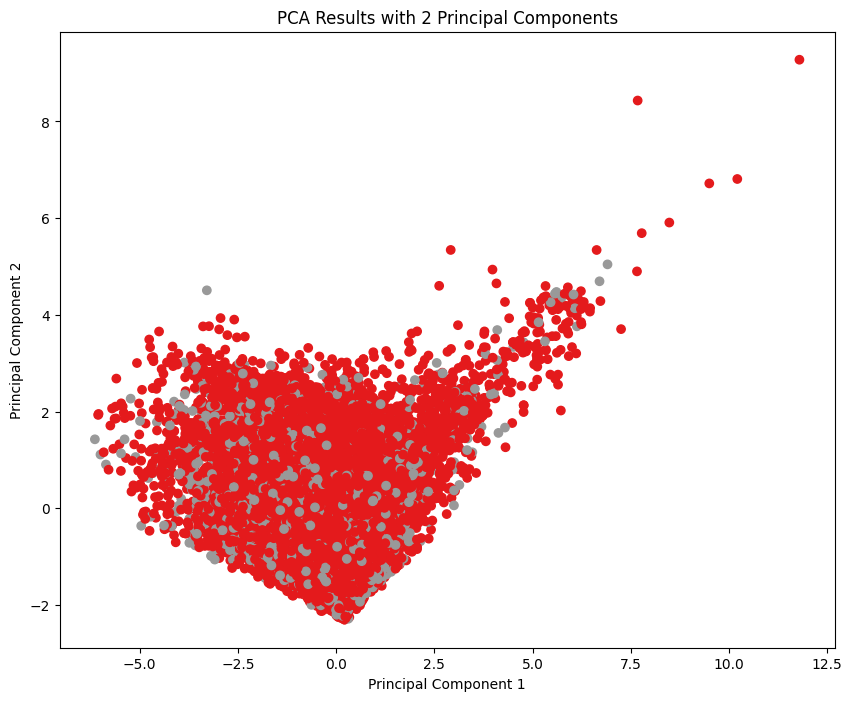

In [ ]:
import matplotlib.pyplot as plt

# Plotting the PCA results with 2 principal components
plt.figure(figsize=(10,8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Set1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results with 2 Principal Components')
plt.show()


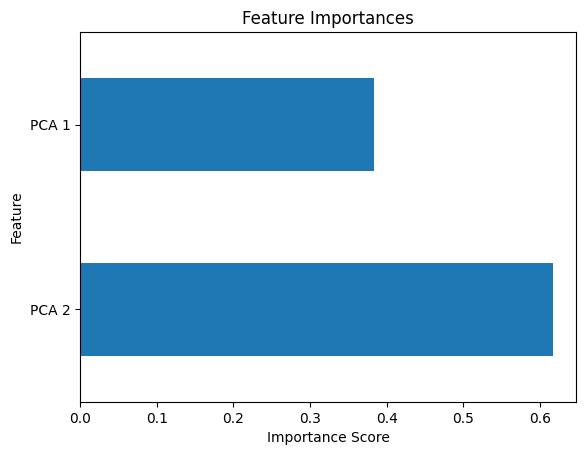

In [ ]:
# Plotting feature importances
feat_importances = pd.Series(rf_model_pca.feature_importances_, index=['PCA 1', 'PCA 2'])
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


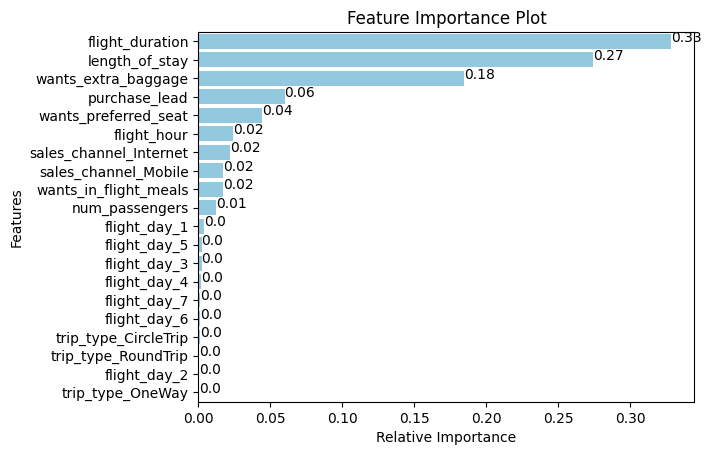

In [ ]:
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y=feature_importances.index, data=feature_importances, color='skyblue')

# Adding text to the bar
for i, v in enumerate(feature_importances['Importance']):
    plt.text(v, i, str(round(v, 2)), color='black', fontweight='normal')

plt.title('Feature Importance Plot')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()
